In [1]:
import numpy as np
#import gcsfs
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
#gcsfs.__version__, xr.__version__

import iris
#iris.FUTURE.netcdf_promote = True
#iris.FUTURE.netcdf_no_unlimited = True
import iris.quickplot as qplt
import iris.plot as iplt
#from iris.experimental.equalise_cubes import equalise_attributes #OUTDATED
from iris.util import equalise_attributes

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)


In [2]:
import matplotlib.ticker
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy
proj = ccrs.Mollweide()

from matplotlib import gridspec
#import matplotlib.gridspec as gridspec

In [4]:
# Define a helper function to convert Iris cube coordinates to numpy arrays
def cube_to_arrays(cube, dim1, dim2):
    # Extract the two dimensions
    dim1_data = cube.coord(dim1).points
    dim2_data = cube.coord(dim2).points
    
    # Create a meshgrid for contour plotting
    X, Y = np.meshgrid(dim1_data, dim2_data)
    Z = cube.data
    return X, Y, Z

In [35]:
#volcanic emission
#from iris import load, Constraint
#fname = "/archive/Shipeng.Zhang/work/CMIP7_volc/utsvolcsulfur_input4MIPs_emissions_CMIP6Plus_source_id_grid_label_1750-2021.nc"
#ds = iris.load(fname)

#NOT WORKING


In [11]:
#try other ways to read it

import netCDF4 as nc

fname = "/archive/Shipeng.Zhang/work/CMIP7_volc/utsvolcsulfur_input4MIPs_emissions_CMIP6Plus_source_id_grid_label_1750-2021.nc"

# Open the file
dataset = nc.Dataset(fname)

# Print information about each variable
for var in dataset.variables:
    print(var, dataset.variables[var])

#dataset.close()

eruption <class 'netCDF4._netCDF4.Variable'>
float64 eruption(eruption)
    Unit: Arbitrary chronological eruption number
    long_name: Arbitrary chronological eruption number
    standard_name: eruption number
unlimited dimensions: 
current shape = (477,)
filling on, default _FillValue of 9.969209968386869e+36 used
volcano_name <class 'netCDF4._netCDF4.Variable'>
vlen volcano_name(eruption)
    Unit: NA
    long_name: Volcano name
    standard_name: volcano name
vlen data type: <class 'str'>
unlimited dimensions: 
current shape = (477,)
eruption_year <class 'netCDF4._netCDF4.Variable'>
float64 eruption_year(eruption)
    Unit: Year CE
    long_name: Eruption year
    standard_name: eruption year
unlimited dimensions: 
current shape = (477,)
filling on, default _FillValue of 9.969209968386869e+36 used
eruption_month <class 'netCDF4._netCDF4.Variable'>
float64 eruption_month(eruption)
    Unit: Month (1-12)
    long_name: Eruption month
    standard_name: eruption month
    Fill flag (

In [19]:
print(dataset.variables.keys())  # This will list all variable names in the file


dict_keys(['eruption', 'volcano_name', 'eruption_year', 'eruption_month', 'eruption_day', 'eruption_longitude', 'eruption_latitude', 'eruption_latitude_uncertainty', 'eruption_sulfur_mass', 'eruption_sulfur_mass_uncertainty', 'eruption_sulfur_injection_height', 'eruption_sulfur_injection_height_uncertainty', 'source_dataset', 'information_eruption_match', 'eruption_match_confidence', 'information_eruption_source_parameters', 'VEI', 'GVP_eruption_number', 'GVP_volcano_number', 'volcano_vent_altitude', 'volcano_vent_altitude_uncertainty', 'icecore_sulfur_asymmetry', 'ice_sulfur_deposition_year'])


In [20]:
print(dataset.variables['eruption_year'][:])

[1755. 1760. 1766. 1770. 1783. 1783. 1783. 1783. 1783. 1783. 1783. 1783.
 1783. 1783. 1786. 1796. 1797. 1809. 1815. 1821. 1822. 1831. 1835. 1845.
 1853. 1856. 1861. 1873. 1875. 1883. 1886. 1890. 1902. 1907. 1912. 1918.
 1924. 1926. 1932. 1943. 1947. 1956. 1963. 1963. 1968. 1979. 1979. 1980.
 1980. 1980. 1980. 1980. 1980. 1981. 1981. 1981. 1982. 1982. 1982. 1982.
 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982.
 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982.
 1983. 1983. 1984. 1984. 1984. 1984. 1985. 1985. 1985. 1986. 1986. 1986.
 1986. 1986. 1987. 1988. 1988. 1989. 1990. 1990. 1990. 1991. 1991. 1991.
 1991. 1991. 1991. 1991. 1992. 1992. 1992. 1992. 1993. 1994. 1994. 1994.
 1996. 1996. 1996. 1997. 1997. 1997. 1998. 1998. 1998. 1998. 1999. 1999.
 1999. 2000. 2000. 2000. 2000. 2000. 2000. 2001. 2001. 2001. 2001. 2001.
 2001. 2002. 2002. 2002. 2002. 2003. 2003. 2003. 2003. 2003. 2004. 2004.
 2004. 2004. 2004. 2004. 2004. 2004. 2004. 2004. 20

In [22]:
print(dataset.variables['volcano_name'][:])

['Katla' 'Kie Besi' 'Hekla' 'Unknown eruption' 'Grimsvotn' 'Grimsvotn'
 'Grimsvotn' 'Grimsvotn' 'Grimsvotn' 'Grimsvotn' 'Grimsvotn' 'Grimsvotn'
 'Grimsvotn' 'Grimsvotn' 'Unknown eruption' 'Unknown eruption'
 'Unknown eruption' 'Unknown eruption' 'Tambora' 'Unknown eruption'
 'Galunggung' 'Unknown eruption' 'Cosiguina' 'Hekla' 'Toya'
 'Hokkaido-Komagatake' 'Kie Besi' 'Unknown eruption' 'Askja' 'Krakatau'
 'Okataina' 'Unknown eruption' 'Santa Maria' 'Ksudach' 'Novarupta' 'Katla'
 'Raikoke' 'Avachinsky' 'Azul, Cerro' 'Unknown eruption'
 'Unknown eruption' 'Bezymianny' 'Agung' 'Agung' 'Fernandina'
 'Soufriere_St_Vincent' 'Etna' 'Mt_St_Helens' 'Mt_St_Helens'
 'Mt_St_Helens' 'Lopevi' 'Etna' 'Ulawun' 'Alaid' 'Pagan' 'Bezymianny'
 'El_Chichon' 'El_Chichon' 'El_Chichon' 'Galunggung' 'Galunggung'
 'Galunggung' 'Galunggung' 'Galunggung' 'Galunggung' 'Galunggung'
 'Galunggung' 'Galunggung' 'Galunggung' 'Galunggung' 'Galunggung'
 'Galunggung' 'Galunggung' 'Galunggung' 'Galunggung' 'Soputan'
 'Galun

In [24]:
pinatubo_indices = np.where(dataset.variables['volcano_name'][:] == 'Pinatubo')[0]
print(pinatubo_indices)

[105 106 107]


In [27]:
print(dataset.variables.keys())  # This will list all variable names in the file

dict_keys(['eruption', 'volcano_name', 'eruption_year', 'eruption_month', 'eruption_day', 'eruption_longitude', 'eruption_latitude', 'eruption_latitude_uncertainty', 'eruption_sulfur_mass', 'eruption_sulfur_mass_uncertainty', 'eruption_sulfur_injection_height', 'eruption_sulfur_injection_height_uncertainty', 'source_dataset', 'information_eruption_match', 'eruption_match_confidence', 'information_eruption_source_parameters', 'VEI', 'GVP_eruption_number', 'GVP_volcano_number', 'volcano_vent_altitude', 'volcano_vent_altitude_uncertainty', 'icecore_sulfur_asymmetry', 'ice_sulfur_deposition_year'])


In [44]:
#check Pinatubo for VER, YEAR, MON, DAY, LAT, LON, ALTMAX, ALTMIN, SO2_TG
print(dataset.variables['VEI'][pinatubo_indices])
print(dataset.variables['eruption_year'][pinatubo_indices])
print(dataset.variables['eruption_month'][pinatubo_indices])
print(dataset.variables['eruption_day'][pinatubo_indices])
print(dataset.variables['eruption_latitude'][pinatubo_indices])
print(dataset.variables['eruption_longitude'][pinatubo_indices])
print(dataset.variables['eruption_sulfur_injection_height'][pinatubo_indices])
print(dataset.variables['eruption_sulfur_mass'][pinatubo_indices])
print(dataset.variables['eruption_latitude_uncertainty'][pinatubo_indices])
print(dataset.variables['eruption_sulfur_injection_height_uncertainty'][pinatubo_indices])

[4. 4. 6.]
[1991. 1991. 1991.]
[6. 6. 6.]
[13. 14. 15.]
[15.13 15.13 15.13]
[120.35 120.35 120.35]
[19. 25. 25.]
[ 0.14   0.054 15.   ]
[0. 0. 0.]
[6.65532 8.93532 8.93532]


In [29]:
Hunga_indices = np.where(dataset.variables['volcano_name'][:] == 'Hunga_Tonga_Hungaapai')[0]
#check Hunga for VER, YEAR, MON, DAY, LAT, LON, ALTMAX, ALTMIN, SO2_TG
print(dataset.variables['VEI'][Hunga_indices])
print(dataset.variables['eruption_year'][Hunga_indices])
print(dataset.variables['eruption_month'][Hunga_indices])
print(dataset.variables['eruption_day'][Hunga_indices])
print(dataset.variables['eruption_latitude'][Hunga_indices])
print(dataset.variables['eruption_longitude'][Hunga_indices])
print(dataset.variables['eruption_sulfur_injection_height'][Hunga_indices])
print(dataset.variables['eruption_sulfur_mass'][Hunga_indices])

[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
[2021. 2021. 2021. 2021. 2021. 2021. 2021. 2021. 2021. 2021.]
[12. 12. 12. 12. 12. 12. 12. 12. 12. 12.]
[19. 20. 21. 22. 24. 27. 28. 29. 30. 31.]
[-20.57 -20.57 -20.57 -20.57 -20.57 -20.57 -20.57 -20.57 -20.57 -20.57]
[-175.38 -175.38 -175.38 -175.38 -175.38 -175.38 -175.38 -175.38 -175.38
 -175.38]
[16. 10. 11. 13. 13. 10. 10. 10. 10. 10.]
[0.01  0.01  0.011 0.013 0.013 0.013 0.011 0.005 0.006 0.006]


In [34]:
#write to a csv file
import csv

# Example arrays
VOLC = dataset.variables['volcano_name'][:]
VEI = dataset.variables['VEI'][:]
YEAR = dataset.variables['eruption_year'][:]
MON = dataset.variables['eruption_month'][:]
DAY = dataset.variables['eruption_day'][:]
LAT = dataset.variables['eruption_latitude'][:]
LON = dataset.variables['eruption_longitude'][:]
ALTMAX = dataset.variables['eruption_sulfur_injection_height'][:]
ALTMIN = dataset.variables['eruption_sulfur_injection_height'][:]
SO2_TG = dataset.variables['eruption_sulfur_mass'][:]

# Open a new CSV file
with open('volcano_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(["Volcano", "VEI", "Year", "Month", "Day", "Latitude", "Longitude", "AltMaxKm", "AltMinKm", "SO2_Tg"])
    
    # Write the data
    for row in zip(VOLC, VEI, YEAR, MON, DAY, LAT, LON, ALTMAX, ALTMIN, SO2_TG):
        writer.writerow(row)


In [37]:
print(dataset.variables['eruption_year'][:])

[1755. 1760. 1766. 1770. 1783. 1783. 1783. 1783. 1783. 1783. 1783. 1783.
 1783. 1783. 1786. 1796. 1797. 1809. 1815. 1821. 1822. 1831. 1835. 1845.
 1853. 1856. 1861. 1873. 1875. 1883. 1886. 1890. 1902. 1907. 1912. 1918.
 1924. 1926. 1932. 1943. 1947. 1956. 1963. 1963. 1968. 1979. 1979. 1980.
 1980. 1980. 1980. 1980. 1980. 1981. 1981. 1981. 1982. 1982. 1982. 1982.
 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982.
 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982. 1982.
 1983. 1983. 1984. 1984. 1984. 1984. 1985. 1985. 1985. 1986. 1986. 1986.
 1986. 1986. 1987. 1988. 1988. 1989. 1990. 1990. 1990. 1991. 1991. 1991.
 1991. 1991. 1991. 1991. 1992. 1992. 1992. 1992. 1993. 1994. 1994. 1994.
 1996. 1996. 1996. 1997. 1997. 1997. 1998. 1998. 1998. 1998. 1999. 1999.
 1999. 2000. 2000. 2000. 2000. 2000. 2000. 2001. 2001. 2001. 2001. 2001.
 2001. 2002. 2002. 2002. 2002. 2003. 2003. 2003. 2003. 2003. 2004. 2004.
 2004. 2004. 2004. 2004. 2004. 2004. 2004. 2004. 20

In [72]:
import pandas as pd
import matplotlib.dates as mdates
# Create DataFrame

df = pd.DataFrame({
    'Year': YEAR,
    'Month': MON,
    'Day': DAY,
    'Latitude': LAT,
    'Height_km': dataset.variables['eruption_sulfur_injection_height'][:],
    'Height_uncertainty': dataset.variables['eruption_sulfur_injection_height_uncertainty'][:],
    'Injection_Mass': SO2_TG
})

# Convert year, month, day to a single datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])


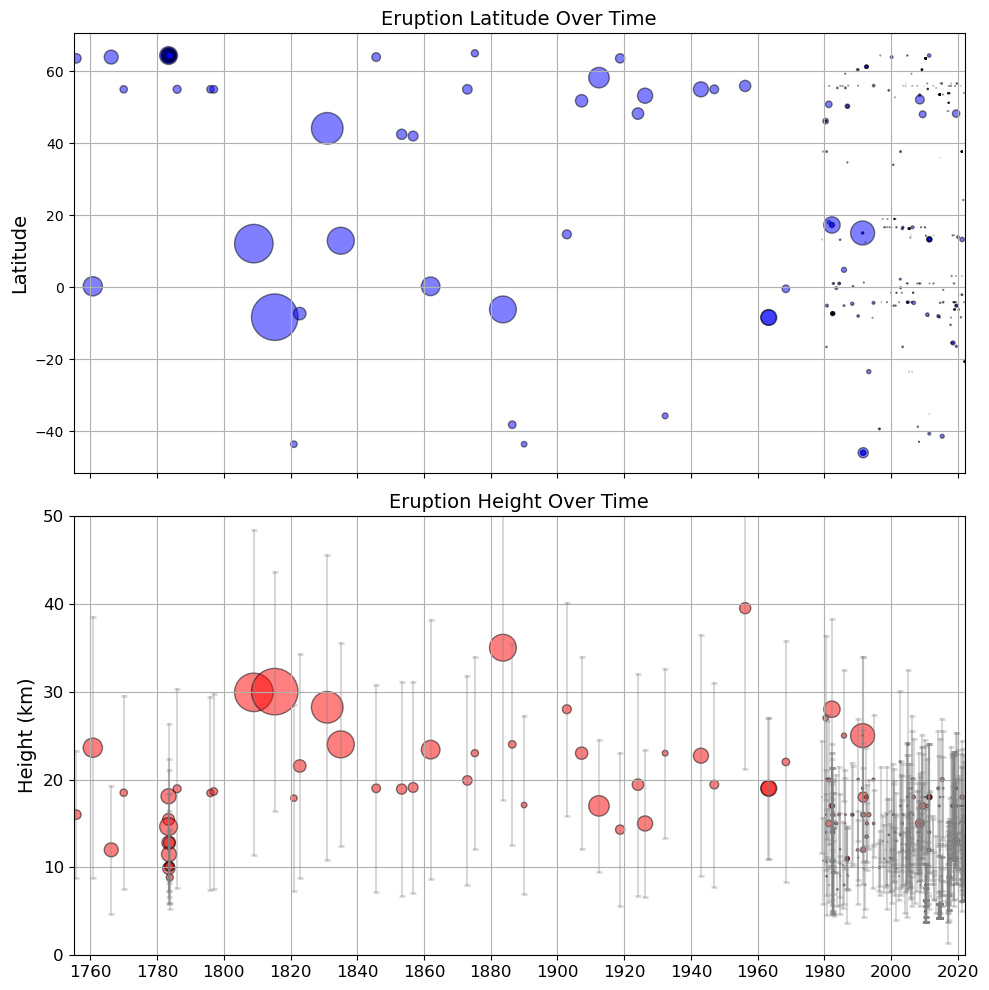

In [80]:
# Set up the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plotting eruption latitude vs. time
scatter1 = ax1.scatter(df['Date'], df['Latitude'], s=df['Injection_Mass']*20,  # Scale size by mass
                       c='blue', alpha=0.5, edgecolor='black')
ax1.set_title('Eruption Latitude Over Time', fontsize=14)
ax1.set_ylabel('Latitude', fontsize=14)
ax1.grid(True)

# Plotting eruption height vs. time
scatter2 = ax2.scatter(df['Date'], df['Height_km'], s=df['Injection_Mass']*20,  # Scale size by mass
                       c='red', alpha=0.5, edgecolor='black')
ax2.set_title('Eruption Height Over Time', fontsize=14)
ax2.set_ylabel('Height (km)', fontsize=14)
ax2.grid(True)

# Add vertical lines to show the range for each point
for idx, row in df.iterrows():
    ax2.plot([row['Date'], row['Date']], 
             [row['Height_km']-row['Height_uncertainty'], 
              row['Height_km']+row['Height_uncertainty']], color='grey', marker='_', markersize=4, markeredgewidth=2,alpha=0.3)

ax2.xaxis.set_major_locator(mdates.YearLocator(20))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set date limits
start_date = pd.to_datetime("1755-01-01")
end_date = df['Date'].max()

ax1.set_xlim([start_date, end_date])
ax2.set_xlim([start_date, end_date])

ax2.set_ylim([0, 50])

plt.xticks(fontsize=12)  # Set font size for x-tick labels
plt.yticks(fontsize=12)  # Set font size for y-tick labels

# Improve layout
plt.tight_layout()

# Show plot
plt.show()


In [48]:
# now read the previous version
file_path = '/archive/Shipeng.Zhang/work/Strat_sul/volcanicso2/volcanicemissions/VolcanEESM_V3.14_Pin14Tg_c20200420.csv'
df0 = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to confirm it's loaded correctly
print(df0.head())

                 Volcano  VEI  Year  Month  Day  Latitude  Longitude  \
0           Raoul Island    4   853      5   21   -29.270    182.080   
1             Izu-Oshima    4   854      9   14    34.724    139.394   
2  Puyehue-Cordon Caulle    5   860      3    1   -40.590    287.883   
3               Alamagan    4   870     12    3    17.600    145.830   
4                    Ata    4   874      7   28    31.220    130.570   

   AltMaxKm  AltMinKm  SO2_Tg  
0      19.6      15.0    2.90  
1      19.6      15.0    5.10  
2      23.0      20.0    7.30  
3      19.6      15.0    0.85  
4      19.6      15.0    3.40  


In [54]:
print(df0['Year'])
print(df['Year'])
print(df['Date'])

0       853
1       854
2       860
3       870
4       874
       ... 
371    2018
372    2019
373    2019
374    2019
375    2019
Name: Year, Length: 376, dtype: int64
0      1755.0
1      1760.0
2      1766.0
3      1770.0
4      1783.0
        ...  
472    2021.0
473    2021.0
474    2021.0
475    2021.0
476    2021.0
Name: Year, Length: 477, dtype: float64
0     1755-10-20
1     1760-09-28
2     1766-04-05
3     1770-01-01
4     1783-06-08
         ...    
472   2021-12-27
473   2021-12-28
474   2021-12-29
475   2021-12-30
476   2021-12-31
Name: Date, Length: 477, dtype: datetime64[ns]


In [61]:
# Convert year, month, day to a single datetime column
#df0['Date'] = pd.to_datetime(df0[['Year', 'Month', 'Day']]) #not working 

# Convert year, month, day to string and concatenate
df0['Date'] = df0['Year'].astype(str) + '-' + df0['Month'].astype(str).str.zfill(2) + '-' + df0['Day'].astype(str).str.zfill(2)
df0['Date'] = pd.to_datetime(df0['Date'], errors='coerce', format='%Y-%m-%d')


In [62]:
print(df0['Date'])
print(df['Date'])

0            NaT
1            NaT
2            NaT
3            NaT
4            NaT
         ...    
371   2018-12-27
372   2019-01-23
373   2019-06-21
374   2019-06-26
375   2019-08-03
Name: Date, Length: 376, dtype: datetime64[ns]
0     1755-10-20
1     1760-09-28
2     1766-04-05
3     1770-01-01
4     1783-06-08
         ...    
472   2021-12-27
473   2021-12-28
474   2021-12-29
475   2021-12-30
476   2021-12-31
Name: Date, Length: 477, dtype: datetime64[ns]


In [66]:
df0 = df0.dropna(subset=['Date'])
print(df0['Date'])

75    1693-06-04
76    1694-07-04
77    1707-12-16
78    1717-08-27
79    1720-04-01
         ...    
371   2018-12-27
372   2019-01-23
373   2019-06-21
374   2019-06-26
375   2019-08-03
Name: Date, Length: 301, dtype: datetime64[ns]


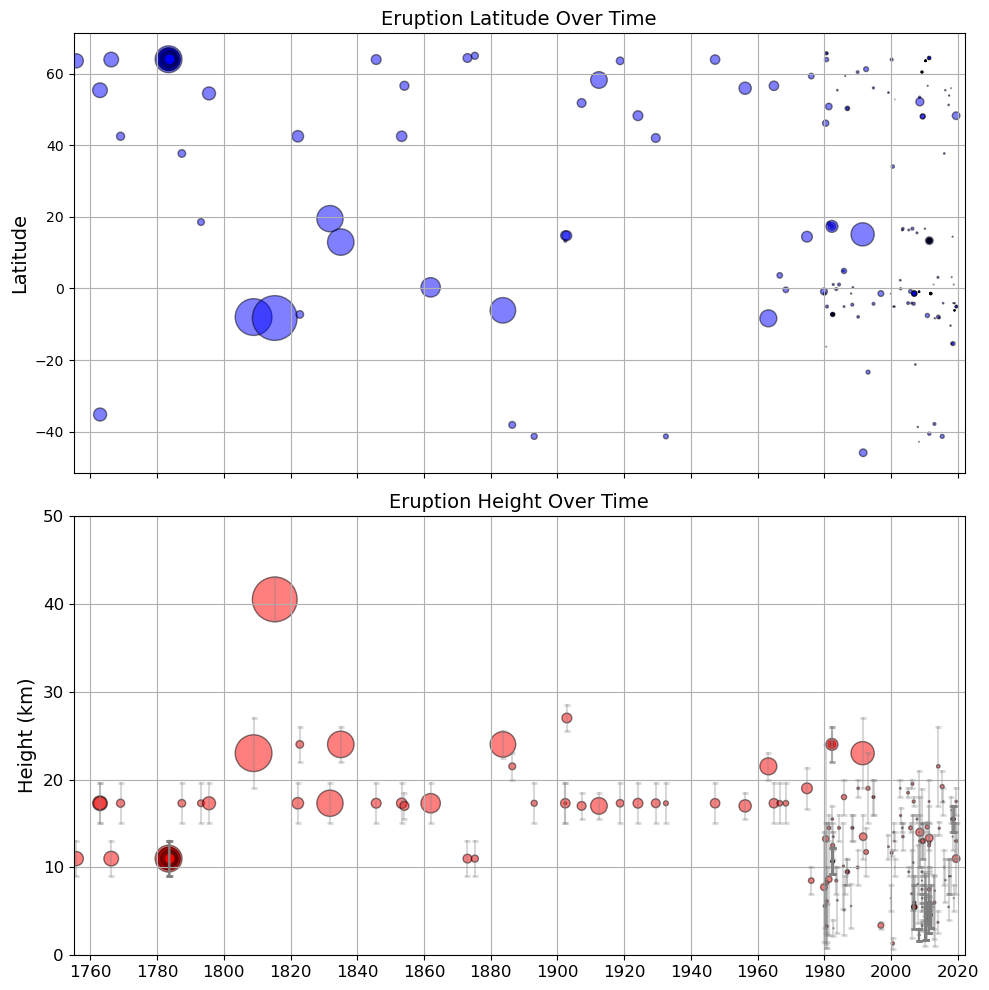

In [81]:
# Set up the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plotting eruption latitude vs. time
scatter1 = ax1.scatter(df0['Date'], df0['Latitude'], s=df0['SO2_Tg']*20,  # Scale size by mass
                       c='blue', alpha=0.5, edgecolor='black')
ax1.set_title('Eruption Latitude Over Time', fontsize=14)
ax1.set_ylabel('Latitude', fontsize=14)
ax1.grid(True)

# Plotting eruption height vs. time
scatter2 = ax2.scatter(df0['Date'], (df0['AltMaxKm']+df0['AltMinKm'])/2, s=df0['SO2_Tg']*20,  # Scale size by mass
                       c='red', alpha=0.5, edgecolor='black')
ax2.set_title('Eruption Height Over Time', fontsize=14)
ax2.set_ylabel('Height (km)', fontsize=14)

# Add vertical lines to show the range for each point
for idx, row in df0.iterrows():
    ax2.plot([row['Date'], row['Date']], [row['AltMinKm'], row['AltMaxKm']], color='gray', marker='_', markersize=4, markeredgewidth=2,alpha=0.3)


ax2.grid(True)
ax2.xaxis.set_major_locator(mdates.YearLocator(20))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set date limits
start_date = pd.to_datetime("1755-01-01")
end_date = df['Date'].max()

ax1.set_xlim([start_date, end_date])
ax2.set_xlim([start_date, end_date])

ax2.set_ylim([0, 50])

plt.xticks(fontsize=12)  # Set font size for x-tick labels
plt.yticks(fontsize=12)  # Set font size for y-tick labels

# Improve layout
plt.tight_layout()

# Show plot
plt.show()
